In [143]:
import pandas as pd
import numpy as np

### Data collection

In [144]:
data=pd.read_csv(r'C:\Users\guptaek\fliprobo_files\Malignant Comments Classifier Project\train.csv')

data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### EDA

In [146]:
data.shape

(159571, 8)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


* No null values present in data

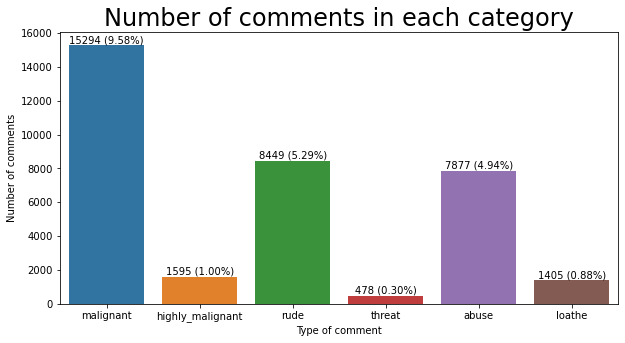

In [148]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
values=data.iloc[:,2:].sum().values
ax=sb.barplot(x=data.columns[2:],y=values)
plt.title('Number of comments in each category',fontsize=24)
plt.xlabel('Type of comment')
plt.ylabel('Number of comments')
for patch,patch_value in zip(ax.patches,values):
    ax.text(x=patch.get_x()+patch.get_width()/2, y= patch.get_height()+5 ,s= '{} ({:.2f}%)'.format(patch_value,(patch_value/1595.71)), ha='center' ,va ='bottom',fontsize=10)

* Out of all non desirable, highest 9% comments are malignant
* least non desirable comments are threat comments (0.3%)

##### comments which have multiple labels

0    89.832112
1     3.985687
3     2.637697
2     2.180847
4     1.102957
5     0.241272
6     0.019427
Name: all_label_sum, dtype: float64

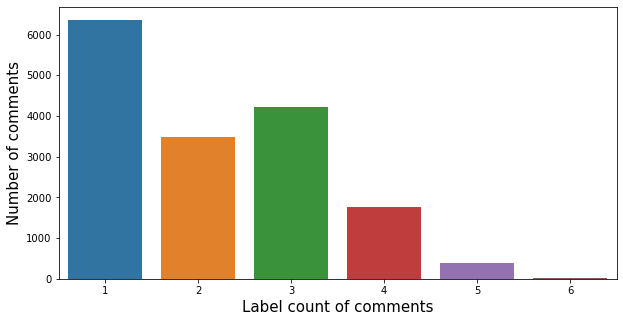

In [149]:
data['all_label_sum']=data.iloc[:,2]+data.iloc[:,3]+data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7]

plt.figure(figsize=(10,5))
sb.countplot(x='all_label_sum',data=data[data['all_label_sum']>0])
plt.xlabel('Label count of comments', fontsize=15)
plt.ylabel('Number of comments',fontsize=15)
data['all_label_sum'].value_counts()/1595.71 


* Approx 31 comments belong to all the classes
* 90% comments are normal
* Highest multilabel comments belong to 3rd category

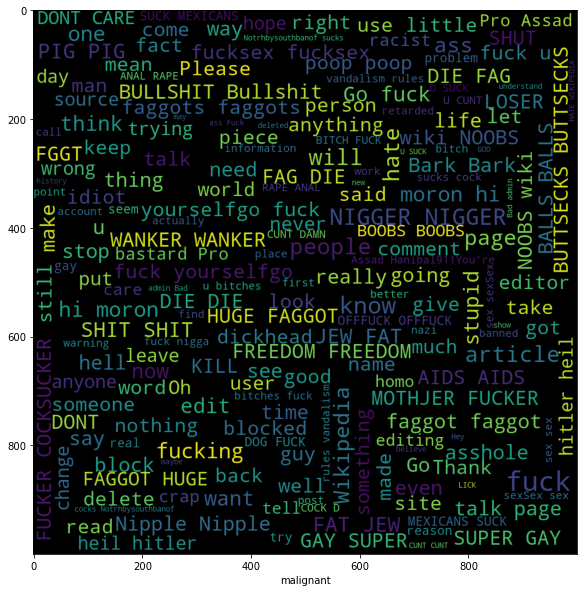

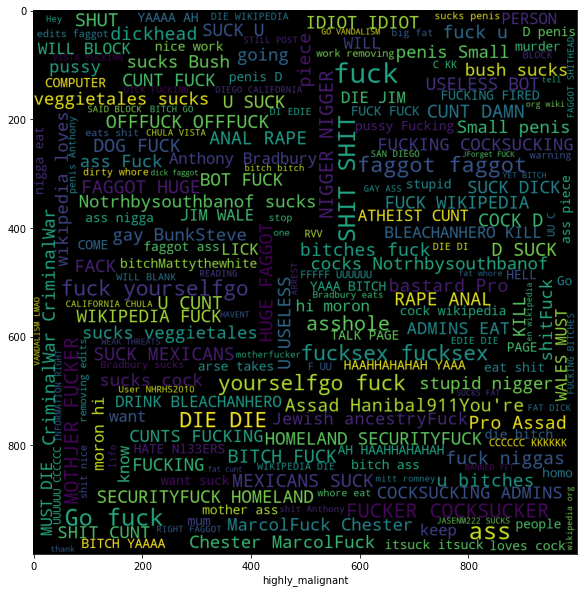

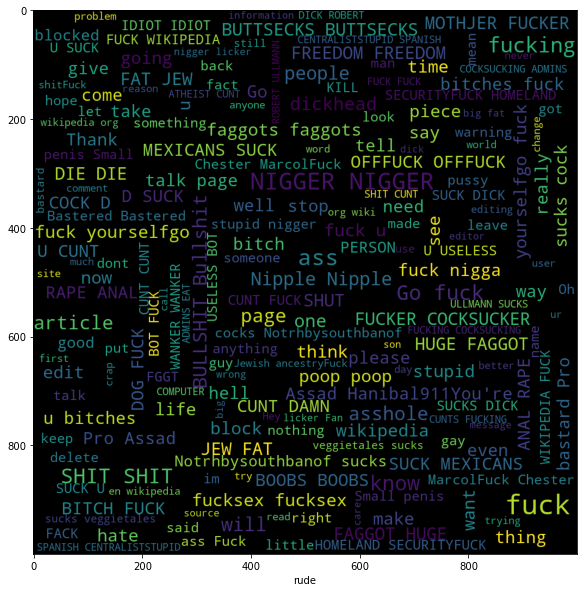

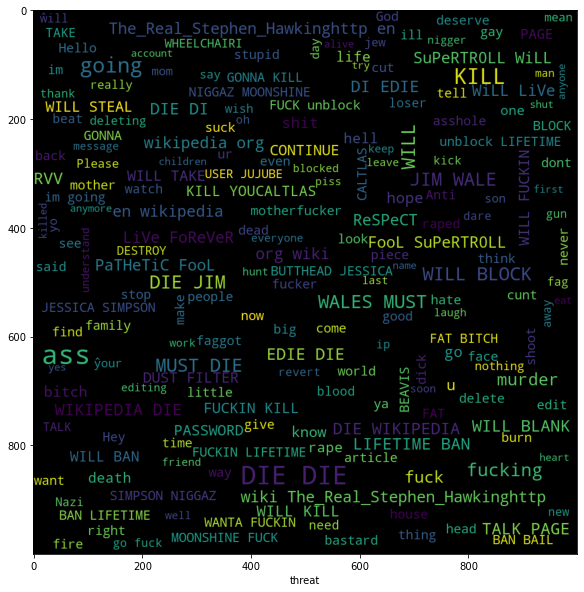

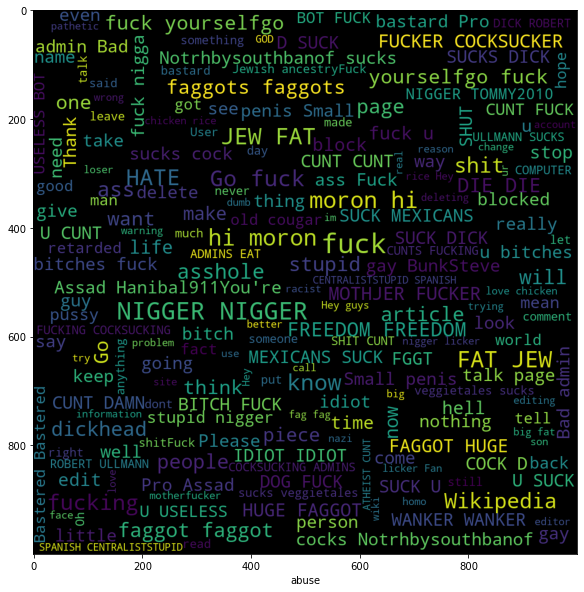

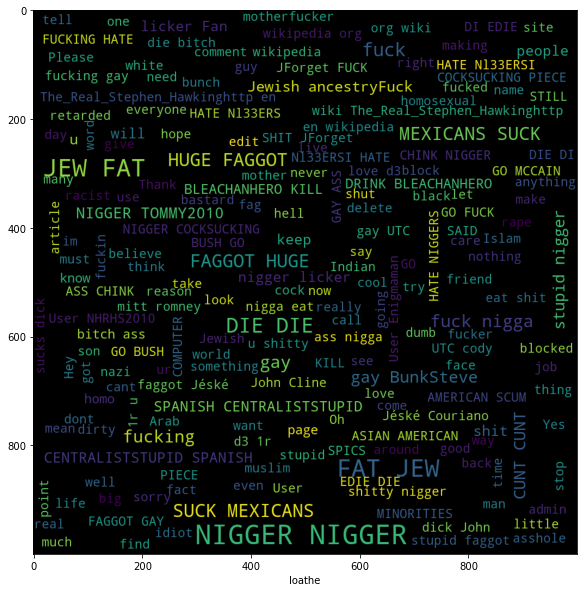

In [286]:
from wordcloud import WordCloud
for i in ['malignant','highly_malignant','rude','threat','abuse','loathe']:
    abnormal_text=data[data[i]>0]['comment_text']
    word_cloud=WordCloud(max_font_size=50,width=1000, height=1000,max_words=200, relative_scaling=0.3).generate(' '.join(abnormal_text))
    #plt.subplots()
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud)
    plt.xlabel(i)



## Data preprocessing

In [151]:
#making a separate data frame
df=data.drop('id',axis=1)
#adding a column containing length of all comments
df['length']=df['comment_text'].str.len()

#### Since we have 90% normal comments therefore dropping 50% of normal comments since rest 50% can also do the work


In [152]:
df_0=df[df['all_label_sum']==0].iloc[60000:,:]
df=pd.concat([df[df['all_label_sum']>0],df_0],axis=0,ignore_index=True)

In [153]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,all_label_sum,length
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,44
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1,319
2,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1,57
3,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4,648
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3,40


In [154]:
df.shape

(99571, 9)

In [156]:
# importing necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re

##### converting all text to small case

##### Removing stopwords

##### considering only alphabets and removing all other characters and Performing Lemmatization

In [161]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
def text_cleaning(text_column):
    
    ## converting all text to lower case
    text_column=text_column.str.lower()
    
    ### Removing stopwords
    unwanted_characters =  [")","(", ",","'",".",":",";","``","...","'","!","=","+","-","==","===","====","*","^",'$',"%",
                       "@","{","}"]
    Stopwords= set(stopwords.words('English')+ unwanted_characters)
    no_stopwords=[]
    for sentence in text_column:
        no_stopwords.append(' '.join([word for word in word_tokenize(sentence) if word not in Stopwords]))
    text_column=no_stopwords
    
   ### considering only alphabets and removing all other characters and Performing Lemmatization 
    mod_sent=[]
    lemma=WordNetLemmatizer()
    for sentence in text_column:
        mod_sent.append(' '.join([lemma.lemmatize(re.sub("[^a-zA-Z]",'',word)) for word in sentence.split()]))
    text_column=mod_sent
    
    ## removing single letter words like 'i'
    c=[]
    for i in text_column:

        c.append(re.sub("\s[a-z]\s"," ",i))
    text_column=c
    return text_column

In [ ]:
d['comment_text']=text_cleaning(df['comment_text'])

In [162]:
df['cleaned_text_length']=df['comment_text'].str.len()

In [163]:
print('Original text length ',df['length'].sum())
print('cleaned text length ',df['cleaned_text_length'].sum())

Original text length  38472510
cleaned text length  24189056


#### using word 2 vec model to convert word to vectors

In [164]:
import gensim
from gensim.models import Word2Vec

In [186]:
sentences= [word_tokenize(sentence) for sentence in df['comment_text']]
len(sentences)

99571

In [187]:
df[df['all_label_sum']==0].shape

(83346, 10)

In [188]:
df.shape

(99571, 10)

In [189]:
w2v=Word2Vec(sentences,vector_size=1000,window=5,min_count=1)

In [190]:
## removing words which are not in w2v vocab 
sentence=[]
index=[]
ind=0
for words in sentences:    
    sent=([word for word in words if word in w2v.wv.key_to_index])
    ## checking if list is not empty
    if(len(sent)>0):
        sentence.append(sent)
    else:
        index.append(ind)
    ind+=1
sentences=sentence

In [191]:
print('empty list count:', len(index),'\ncomments count :',len(sentences))

empty list count: 56 
comments count : 99515


In [192]:
def sentence_to_vector(sentence,dim):
    return np.mean(w2v.wv[sentence],axis=0).reshape(1,dim)

In [193]:
train_vector=np.concatenate([sentence_to_vector(sentence,1000) for sentence in sentences])

In [194]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(train_vector)
train_vector=minmax.transform(train_vector)

In [291]:
train_vector.skew

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

## Model preparation

In [184]:

###preparing model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve,auc,accuracy_score, recall_score ,precision_score,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Preparing a method which will give all metrices score for the model we we will pass in the method parameter
def model_performance(train_x,train_y,test_x,test_y,model):
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Confusion matrix :\n',confusion_matrix(test_y,pred,labels=[1,0]))
    print('\nclassification_report :\n',classification_report(test_y,pred))
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc( false_positive_rate,true_positive_rate)
    print('\nroc_auc_score :\n',roc_auc)
    #roc_score.append(roc_auc)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(model)
    print(sb.heatmap(confusion_matrix(test_y,pred),annot=True))
    plt.subplot(912)
    plt.title('roc_auc')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend('lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

#### Metric selection-since we need to correctly predict the anbormal comment(1) i decided to evaluate the model on Recall . The reason being model should not miss any abormal text i.e low false negative (high Recall) on the other hand even if it predicts high false positives (means predicting a normal text as abnormal) futher analysis can be done but not in case if it miss any abormal comment. The first approach would be to see if  precision and Recall both can be better

$$$$$$$$$$$$$$$ LogisticRegression $$$$$$$$$$$$$$
Confusion matrix :
 [[ 2421  2167]
 [  681 24586]]

classification_report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     25267
           1       0.78      0.53      0.63      4588

    accuracy                           0.90     29855
   macro avg       0.85      0.75      0.79     29855
weighted avg       0.90      0.90      0.90     29855


roc_auc_score :
 0.7503643778430666
AxesSubplot(0.125,0.808774;0.62x0.0712264)



$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$
Confusion matrix :
 [[ 2521  2067]
 [ 1018 24249]]

classification_report :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     25267
           1       0.71      0.55      0.62      4588

    accuracy                           0.90     29855
   macro avg       0.82      0.75      0.78     29855
weighted avg       0.89      0.90      0.89     29855


roc_auc_score :
 

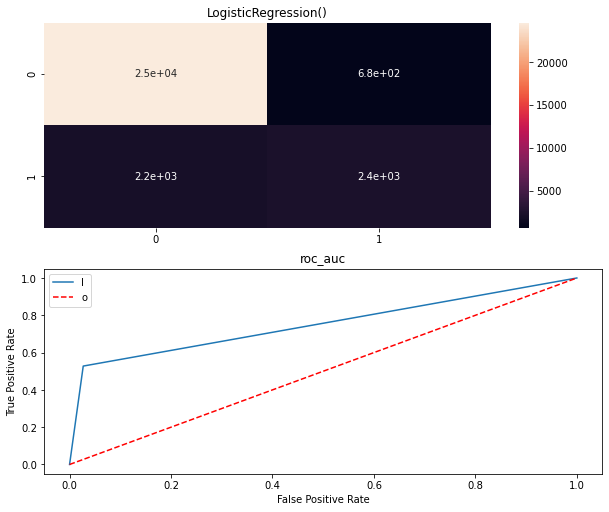

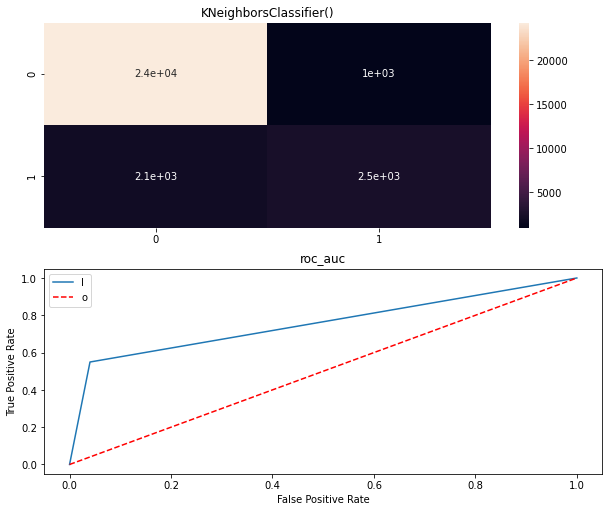

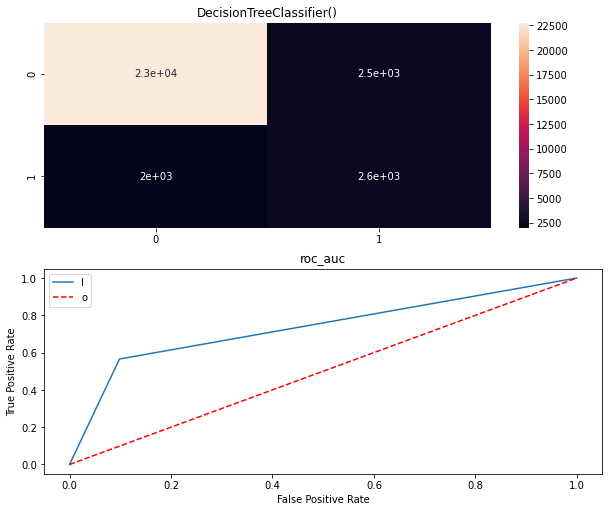

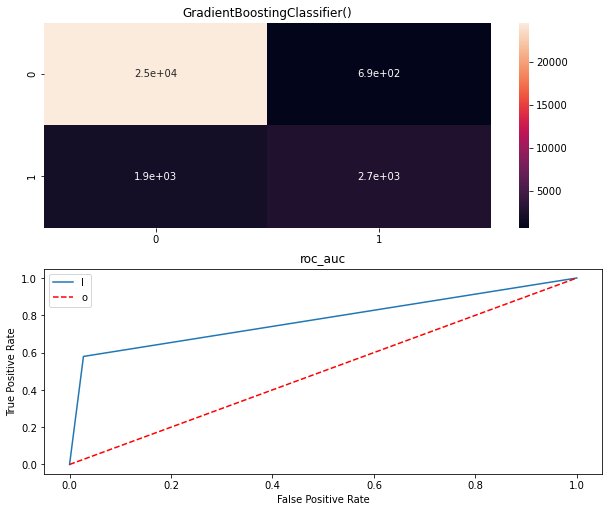

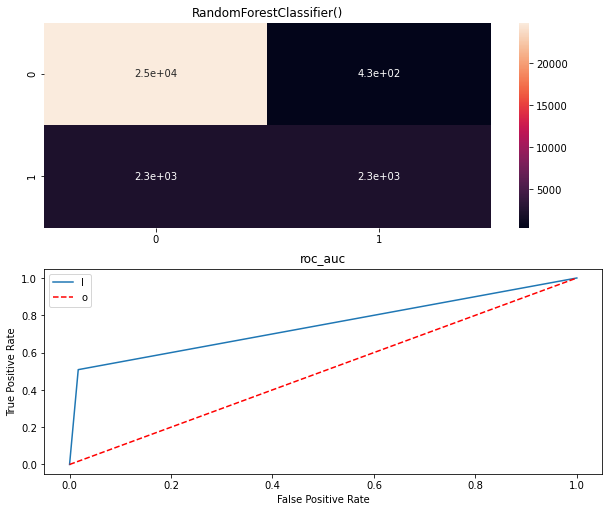

In [288]:
## dropping empty indexes from y
Y=df['malignant'].drop(index)

train_x,test_x,train_y,test_y=train_test_split(train_vector,Y,test_size=0.3,random_state=42,stratify=Y,shuffle=True)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),
        RandomForestClassifier()]
for i,k in zip(models,['LogisticRegression','KNeighbor','DecisionTree','GBM','RandomForest']):
    print('$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$')
    model_performance(train_x,train_y,test_x,test_y,i)

In [ ]:
from sklearn.model_selection import GridSearchCV
def tune_parameters(x,y,model,para_dict):
    gds= GridSearchCV(estimator=model, param_grid=para_dict, cv=2,scoring='f1')
    gds.fit(x,y)
    #print('Best score' , gds.best_score_)
    print('Best Parameter', gds.best_params_)

In [202]:
def get_parameter(x,y,Para_Dict_list):
    for each_dict in Para_Dict_list:
        tune_parameters(x,y,RandomForestClassifier(),each_dict)

In [ ]:
para_dict1={'n_estimators':[100,500,100,2000],'max_features':['auto','sqrt']}
tune_parameters(train_vector, Y,RandomForestClassifier(),para_dict1)

In [ ]:
para_dict2={'max_depth':range(5,30,6)}
tune_parameters(train_vector, Y,RandomForestClassifier(),para_dict2)

In [ ]:
para_dict3={'min_samples_split':[2,20,50]}
tune_parameters(train_vector, Y,RandomForestClassifier(),para_dict3)

In [ ]:
para_dict4={'min_samples_leaf':[1,2,5,10]}
tune_parameters(train_vector, Y,RandomForestClassifier(),para_dict4)

In [289]:
# train test split
x_train,x_test, y_train, y_test=train_test_split(train_vector, Y,test_size=0.3,shuffle=True, stratify=Y,random_state=1)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(69660, 1000) (69660,) (29855, 1000) (29855,)


In [290]:
from sklearn.model_selection import train_test_split
model=RandomForestClassifier(n_estimators=2000 , max_features='sqrt' ,max_depth= 17, min_samples_split=2 , min_samples_leaf=2)
model.fit(x_train, y_train)
pred=model.predict(x_test)
print(confusion_matrix(y_test,pred,labels=[1,0]))
print(classification_report(y_test, pred))

[[ 2305  2283]
 [  419 24848]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     25267
           1       0.85      0.50      0.63      4588

    accuracy                           0.91     29855
   macro avg       0.88      0.74      0.79     29855
weighted avg       0.91      0.91      0.90     29855



In [212]:
def get_results_for_model(x_train,y_train,x_test,y_test,model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(confusion_matrix(y_test,pred,labels=[1,0]))
    print(classification_report(y_test, pred))
    return model

#### Trying ANN in Deep learning to see if we can get a better model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , LeakyReLU
from tensorflow import keras
from keras.metrics import Recall , Precision , PrecisionAtRecall, FalseNegatives , FalsePositives
import kerastuner

In [ ]:
## Doing hyperparameter usng keras tuners to get number of layers and neurons to be used in ANN model

In [ ]:
## making model builder function to be used in Random search
from kerastuner.tuners  import RandomSearch
def model_builder(hp):
    model=Sequential()
    for i in range(hp.Int('unit',2,20)):
        model.add(Dense(units=hp.Int('units'+str(i),min_value=32 , max_value=512,step=32), activation='linear'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[0.001,0.01])),
                    metrics=[Recall(), Precision(),FalseNegatives() , FalsePositives()])
    return model

In [ ]:
### making tuner object declaring objetive as False negative to be minimum
tuner=RandomSearch( 
    model_builder,
    objective=kerastuner.Objective("val_false_negatives", direction="min"),
    max_trials=1,
    executions_per_trial=5,
    directory='project1',
    project_name='Malignant'

)

In [ ]:
tuner.search(x_train,y_train, batch_size=50,epochs= 5,validation_data=(x_test,y_test))

In [ ]:
best_model=tuner.get_best_models(num_models=1)
best_model[0].evaluate(x_test,y_test)

#### conclusion: Although Recall is increased drastically to 81% but it decreased precision to much extent leading sum of FP and FN to be 4600 .Whereas Decision Tree classifier has given much better results giving the sum of FP +FN as 2700 Hence choosing Decision Tree as final model

#### Preapring similar model for all remaining labels , one model for each label

In [205]:
para_dict_list=[{'n_estimators':[2000],'max_features':['auto','sqrt']},
                {'max_depth':range(5,30,6)},
                {'min_samples_split':[2,20,50]},
                {'min_samples_leaf':[1,2,5,10]}]
## getting best model parameters for 'highly_malignant' label
y_highly_malignant=df['highly_malignant'].drop(index)
get_parameter(train_vector,y_highly_malignant,para_dict_list)

Best Parameter {'max_features': 'sqrt'}
Best Parameter {'max_depth': 29}
Best Parameter {'min_samples_split': 2}
Best Parameter {'min_samples_leaf': 1}


In [213]:
# train test split
x_train,x_test, y_train, y_test=train_test_split(train_vector, y_highly_malignant,test_size=0.3,shuffle=True, 
                                                 stratify=y_highly_malignant,random_state=1)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)
model_highly_malignant=get_results_for_model(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=2000 
                                            , max_features='sqrt',max_depth=29,min_samples_split=2, min_samples_leaf=1))

(69660, 1000) (69660,) (29855, 1000) (29855,)
[[   60   419]
 [   41 29335]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29376
           1       0.59      0.13      0.21       479

    accuracy                           0.98     29855
   macro avg       0.79      0.56      0.60     29855
weighted avg       0.98      0.98      0.98     29855



In [206]:
## getting best model parameters for 'rude' label
y_rude=df['rude'].drop(index)
get_parameter(train_vector,y_rude,para_dict_list)

Best Parameter {'max_features': 'sqrt'}
Best Parameter {'max_depth': 17}
Best Parameter {'min_samples_split': 2}
Best Parameter {'min_samples_leaf': 2}


In [221]:
# train test split
x_train,x_test, y_train, y_test=train_test_split(train_vector, y_rude,test_size=0.3,shuffle=True, stratify=y_rude,random_state=1)
model_rude_=get_results_for_model(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=2000 , max_features='sqrt',max_depth=17,min_samples_split=2, min_samples_leaf=2))

[[ 1168  1367]
 [  164 27156]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27320
           1       0.88      0.46      0.60      2535

    accuracy                           0.95     29855
   macro avg       0.91      0.73      0.79     29855
weighted avg       0.95      0.95      0.94     29855



In [207]:
## getting best model parameters for 'threat' label
y_threat=df['threat'].drop(index)
get_parameter(train_vector,y_threat,para_dict_list)

Best Parameter {'max_features': 'sqrt'}
Best Parameter {'max_depth': 23}
Best Parameter {'min_samples_split': 2}
Best Parameter {'min_samples_leaf': 1}


In [222]:
# train test split
x_train,x_test, y_train, y_test=train_test_split(train_vector, y_threat,test_size=0.3,shuffle=True, stratify=y_threat,random_state=1)
model_threat=get_results_for_model(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=2000 , max_features='sqrt',max_depth=23,min_samples_split=2, min_samples_leaf=1))

[[    5   138]
 [    4 29708]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29712
           1       0.56      0.03      0.07       143

    accuracy                           1.00     29855
   macro avg       0.78      0.52      0.53     29855
weighted avg       0.99      1.00      0.99     29855



In [208]:
## getting best model parameters for 'abuse' label
y_abuse=df['abuse'].drop(index)
get_parameter(train_vector,y_abuse,para_dict_list)

Best Parameter {'max_features': 'auto'}
Best Parameter {'max_depth': 17}
Best Parameter {'min_samples_split': 2}
Best Parameter {'min_samples_leaf': 2}


In [223]:
# train test split
x_train,x_test, y_train, y_test=train_test_split(train_vector, y_abuse,test_size=0.3,shuffle=True, stratify=y_abuse,random_state=1)
model_abuse=get_results_for_model(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=2000 , max_features='auto',max_depth=17,min_samples_split=2, min_samples_leaf=2))

[[  913  1450]
 [  214 27278]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27492
           1       0.81      0.39      0.52      2363

    accuracy                           0.94     29855
   macro avg       0.88      0.69      0.75     29855
weighted avg       0.94      0.94      0.94     29855



In [209]:
## getting best model parameters for 'loathe' label
y_loathe=df['loathe'].drop(index)
get_parameter(train_vector,y_loathe,para_dict_list)

Best Parameter {'max_features': 'sqrt'}
Best Parameter {'max_depth': 23}
Best Parameter {'min_samples_split': 20}
Best Parameter {'min_samples_leaf': 2}


In [217]:
# train test split
x_train,x_test, y_train, y_test=train_test_split(train_vector, y_loathe,test_size=0.3,shuffle=True, stratify=y_loathe,random_state=1)
model_rude=get_results_for_model(x_train, y_train, x_test, y_test, RandomForestClassifier(n_estimators=2000 , max_features='sqrt',max_depth=23,min_samples_split=20, min_samples_leaf=2))

[[   29   393]
 [    5 29428]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29433
           1       0.85      0.07      0.13       422

    accuracy                           0.99     29855
   macro avg       0.92      0.53      0.56     29855
weighted avg       0.98      0.99      0.98     29855



#### importing test data

In [ ]:
test_data=pd.read_csv(r'C:\Users\guptaek\fliprobo_files\Malignant Comments Classifier Project\test.csv')

In [ ]:
test_data.head()

In [ ]:
## cleaning test data
test_data=text_cleaning(test_data['comment_text'])

In [ ]:
## Data preprocessing on test data

sentences= [word_tokenize(sentence) for sentence in test_data]
## removing words which are not in w2v vocab 
sentence=[]
index=[]
ind=0
for words in sentences:    
    sent=([word for word in words if word in w2v.wv.key_to_index])
    ## checking if list is not empty
    if(len(sent)>0):
        sentence.append(sent)
    else:
        index.append(ind)
    ind+=1
sentences=sentence
test_vector=np.concatenate([sentence_to_vector(sentence,1000) for sentence in sentences])

test_vector=minmax.transform(test_vector)

In [224]:
test_vector.shape

(151541, 1000)

In [225]:
predictions_1=model.predict(test_vector)
predictions_2=model_highly_malignant.predict(test_vector)
predictions_3=model_rude_.predict(test_vector)
predictions_4=model_threat.predict(test_vector)
predictions_5=model_abuse.predict(test_vector)
predictions_6=model_loathe.predict(test_vector)

In [241]:
predictions=pd.DataFrame({'Malignant':predictions_1,'Highly_malignant': predictions_2,
                          'rude':predictions_3,'threat' :predictions_4,
                          'abuse': predictions_5,'loathe': predictions_6})

In [266]:
predictions.to_csv('Predictions.csv')

In [283]:
predicitions_prob=model.predict_proba(test_vector)

In [ ]:
pd.DataFrame(data=predicitions_prob).to_csv('predicitions_prob.csv')